<a href="https://colab.research.google.com/github/adnaneaabbar/stock-trading-system/blob/master/Testing_Optimized_Methods_On_Large_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import matplotlib
from jedi.api.refactoring import inline
from utils import *

import time
import numpy as np
import pandas as pd

from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

import warnings

import bert

from collections import deque

In [0]:
warnings.filterwarnings("ignore")

context = mx.cpu(); model_ctx=mx.cpu()
mx.random.seed(1719)

In [0]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [0]:
dataset_ex_df = pd.read_csv('https://raw.githubusercontent.com/adnaneaabbar/stock-trading-system/master/data/ge.csv?token=AKSKTRWPUP4GMYBFXJOASHK62G7KG', header=0, parse_dates=[0], date_parser=parser)

In [13]:
print('There are {} number of days in the dataset.'.format(dataset_ex_df.shape[0]))

There are 14058 number of days in the dataset.


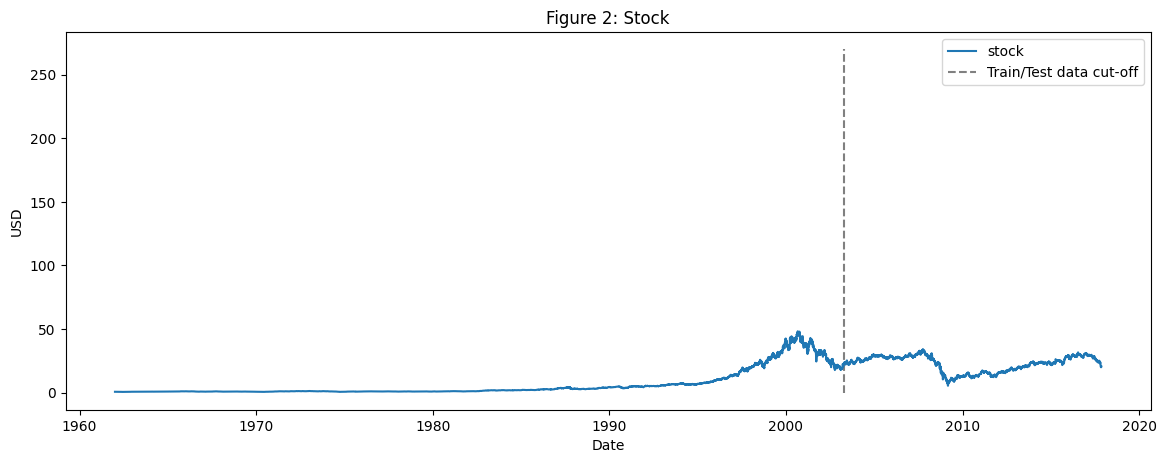

In [22]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df['Date'], dataset_ex_df['Close'], label='stock')
plt.vlines(datetime.date(2003,4, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Stock')
plt.legend()
plt.show()

In [24]:
num_training_days = int(dataset_ex_df.shape[0]*.75)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days,dataset_ex_df.shape[0]-num_training_days))

Number of training days: 10543. Number of test days: 3515.
